<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/Deep-Learning-_-Pytorch/blob/main/Mark_1_HandWrittenDigits_GrayscaleIMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

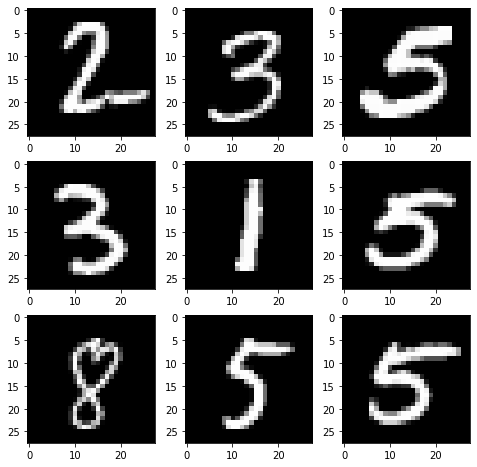

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
class First_NN(nn.Module):
    def __init__(self):
        super(First_NN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 728),
            nn.ReLU(),
            nn.Linear(728, 728),
            nn.ReLU(),
            nn.Linear(728, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = First_NN()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303507  [    0/60000]
loss: 2.300858  [ 6400/60000]
loss: 2.289841  [12800/60000]
loss: 2.287675  [19200/60000]
loss: 2.274704  [25600/60000]
loss: 2.269763  [32000/60000]
loss: 2.267630  [38400/60000]
loss: 2.269175  [44800/60000]
loss: 2.253181  [51200/60000]
loss: 2.244161  [57600/60000]
Test Error: 
 Accuracy: 54.4%, Avg loss: 2.245641 

Epoch 2
-------------------------------
loss: 2.246808  [    0/60000]
loss: 2.239900  [ 6400/60000]
loss: 2.241205  [12800/60000]
loss: 2.214734  [19200/60000]
loss: 2.217778  [25600/60000]
loss: 2.209049  [32000/60000]
loss: 2.190909  [38400/60000]
loss: 2.212965  [44800/60000]
loss: 2.176224  [51200/60000]
loss: 2.160182  [57600/60000]
Test Error: 
 Accuracy: 65.1%, Avg loss: 2.164683 

Epoch 3
-------------------------------
loss: 2.166704  [    0/60000]
loss: 2.150491  [ 6400/60000]
loss: 2.166212  [12800/60000]
loss: 2.103442  [19200/60000]
loss: 2.124771  [25600/60000]
loss: 2.107184  [32000/600